In [2]:
pip install torch torchvision matplotlib

  Using cached cycler-0.12.1-py3-none-any.whl.metadata (3.8 kB)
  Using cached pyparsing-3.2.3-py3-none-any.whl.metadata (5.0 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.9/1.9 MB 5.8 MB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.1/8.1 MB 8.5 MB/s eta 0:00:00a 0:00:01
Using cached cycler-0.12.1-py3-none-any.whl (8.3 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.8/2.8 MB 8.5 MB/s eta 0:00:00ta 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.4/5.4 MB 9.9 MB/s eta 0:00:00ta 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.7/4.7 MB 8.9 MB/s eta 0:00:00ta 0:00:01
Using cached pyparsing-3.2.3-py3-none-any.whl (111 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9/9 [matplotlib]9 [matplotlib]]

[notice] A new release of pip is available: 25.1.1 -> 25.2
[notice] To update, run: /opt/homebrew/opt/python@3.11/bin/python3.11 -m pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [12]:
pip install numpy 


[notice] A new release of pip is available: 25.1.1 -> 25.2
[notice] To update, run: /opt/homebrew/opt/python@3.11/bin/python3.11 -m pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [2]:
import torch
import torch.nn as nn
from torchvision import transforms
from PIL import Image
import json
import numpy as np
import matplotlib.pyplot as plt
from model import UNet  # Assuming UNet class is in model.py
import os

In [3]:
device = torch.device("cpu")

model = UNet(in_channels=3 + 3, out_channels=3).to(device)
model.load_state_dict(torch.load("trained_model.pth", map_location=device))
model.eval()

UNet(
  (enc1): Sequential(
    (0): Conv2d(6, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU(inplace=True)
    (2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU(inplace=True)
  )
  (enc2): Sequential(
    (0): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU(inplace=True)
    (2): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU(inplace=True)
  )
  (enc3): Sequential(
    (0): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU(inplace=True)
    (2): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU(inplace=True)
  )
  (pool): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (middle): Sequential(
    (0): Conv2d(256, 512, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU(inplace=True)
    (2): Conv2d(512, 512, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
 

In [4]:
color_map = {
    "red": [1.0, 0.0, 0.0],
    "green": [0.0, 1.0, 0.0],
    "blue": [0.0, 0.0, 1.0],
    "yellow": [1.0, 1.0, 0.0],
    "cyan": [0.0, 1.0, 1.0],
    "magenta": [1.0, 0.0, 1.0],
    "orange": [1.0, 0.5, 0.0],
    "purple": [0.5, 0.0, 0.5],
}

In [5]:
def preprocess_image(img_path):
    image = Image.open(img_path).convert("RGB")
    tf = transforms.Compose([
        transforms.Resize((128, 128)),
        transforms.ToTensor()
    ])
    return tf(image)

In [6]:
with open("dataset/validation/data.json") as f:
    data = json.load(f)

In [7]:
sample = data[3]  # Change index as needed
img_path = os.path.join("dataset/validation/inputs", sample["input_polygon"])
color = sample["colour"]


In [8]:
polygon_img = preprocess_image(img_path).to(device)  # shape: [3, H, W]
color_tensor = torch.tensor(color_map[color]).view(3, 1, 1).repeat(1, 128, 128).to(device)
input_tensor = torch.cat([polygon_img, color_tensor], dim=0).unsqueeze(0)  # shape: [1, 6, H, W]

In [9]:
with torch.no_grad():
    output = model(input_tensor).squeeze(0).cpu().clamp(0, 1)


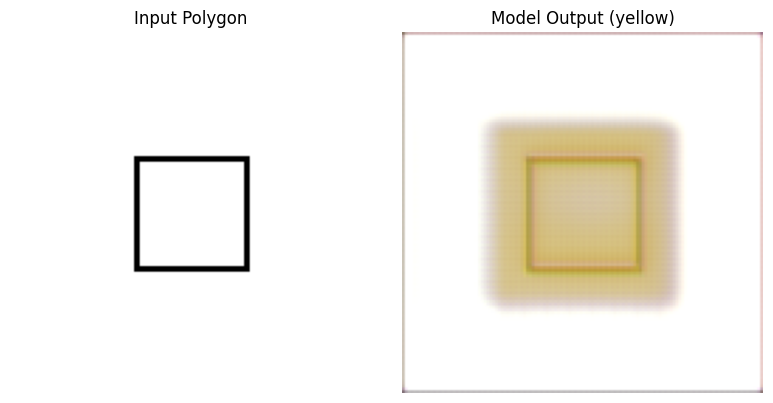

In [10]:
fig, axs = plt.subplots(1, 2, figsize=(8, 4))
axs[0].imshow(polygon_img.permute(1, 2, 0).cpu())
axs[0].set_title("Input Polygon")
axs[1].imshow(output.permute(1, 2, 0))
axs[1].set_title(f"Model Output ({color})")
for ax in axs:
    ax.axis("off")
plt.tight_layout()
plt.show()
